In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

pd.options.display.max_rows=50
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

In [2]:
df= pd.read_csv('D:/Sayali/Completed_assign/Assign_12_EDA2/adult_EDA.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


#### While age is min 17, max 90, hours.per.week is min 1, max 99.

In [7]:
df.select_dtypes(include="object").describe() 

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [8]:
df.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
for col in df.select_dtypes(include="object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("**********************************************************")

workclass
***
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
**********************************************************
education
***
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
**********************************************************
marital.status
***
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Mar

In [10]:
df.isin(["?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [11]:
df.isin(["?"]).sum() 

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
df.replace("?","Unknown")

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [13]:
df.replace("?","Unknown", inplace = True)
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
df.education.value_counts(dropna=False)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [15]:
df.groupby("education")["education.num"].value_counts(dropna=False)

education     education.num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
Name: education.num, dtype: int64

In [16]:
two_columns = df[['education', 'education.num']]
two_columns

,education,education.num
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
...,...,...
32556,Some-college,10
32557,Assoc-acdm,12
32558,HS-grad,9
32559,HS-grad,9


#### As can be seen, "education" and "education.num" mean the same thing. Therefore, it is good to delete one of them from the data frame. Let's delete "education.num".

In [17]:
df.drop("education.num", axis=1, inplace = True)

#### Replace "Not-in-family", "Other-relative" values in this column with "Unmaried".

In [18]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [19]:
df.replace(["Not-in-family","Other-relative"], "Unmarried", inplace=True)

In [20]:
df.relationship.value_counts()

Husband      13193
Unmarried    12732
Own-child     5068
Wife          1568
Name: relationship, dtype: int64

In [21]:
# Create new features
df['education_occupation'] = df['education'] + '_' + df['occupation']
df['capital_gain_loss_ratio'] = df['capital.gain'] / (df['capital.loss'] + 1)

# Apply log transformation to a skewed numerical feature
df['log_hours_per_week'] = np.log(df['hours.per.week'] + 1)

# Display the updated DataFrame
print(df.head())

   age workclass  fnlwgt     education marital.status         occupation  \
0   90   Unknown   77053       HS-grad        Widowed            Unknown   
1   82   Private  132870       HS-grad        Widowed    Exec-managerial   
2   66   Unknown  186061  Some-college        Widowed            Unknown   
3   54   Private  140359       7th-8th       Divorced  Machine-op-inspct   
4   41   Private  264663  Some-college      Separated     Prof-specialty   

  relationship   race     sex  capital.gain  capital.loss  hours.per.week  \
0    Unmarried  White  Female             0          4356              40   
1    Unmarried  White  Female             0          4356              18   
2    Unmarried  Black  Female             0          4356              40   
3    Unmarried  White  Female             0          3900              40   
4    Own-child  White  Female             0          3900              40   

  native.country income         education_occupation  capital_gain_loss_ratio  \

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      32561 non-null  int64  
 1   workclass                32561 non-null  object 
 2   fnlwgt                   32561 non-null  int64  
 3   education                32561 non-null  object 
 4   marital.status           32561 non-null  object 
 5   occupation               32561 non-null  object 
 6   relationship             32561 non-null  object 
 7   race                     32561 non-null  object 
 8   sex                      32561 non-null  object 
 9   capital.gain             32561 non-null  int64  
 10  capital.loss             32561 non-null  int64  
 11  hours.per.week           32561 non-null  int64  
 12  native.country           32561 non-null  object 
 13  income                   32561 non-null  object 
 14  education_occupation  

In [23]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df[['age','fnlwgt','capital.gain','capital.loss', 'hours.per.week']] = scaler_standard.fit_transform(df[['age','fnlwgt','capital.gain','capital.loss', 'hours.per.week']])
df[['age','fnlwgt','capital.gain','capital.loss', 'hours.per.week']] = scaler_minmax.fit_transform(df[['age','fnlwgt','capital.gain','capital.loss', 'hours.per.week']])

In [24]:
# Apply One-Hot Encoding for categories with less than 5 unique values
one_hot_cols = [col for col in df.columns if df[col].nunique() < 5]
one_hot_encoder = OneHotEncoder()
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_cols])

# Use Label Encoding for categories with more than 5 unique values
label_cols = [col for col in df.columns if df[col].nunique() >= 5]
label_encoder = LabelEncoder()
label_encoded = df[label_cols].apply(label_encoder.fit_transform)

# # Display the encoded data
# print("One-Hot Encoded Data:")
# print(one_hot_encoded)
# print("\nLabel Encoded Data:")
# print(label_encoded)

#### correlation between variables and also check outliers in any of the columns.

In [25]:
df.select_dtypes("number").corr()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,capital_gain_loss_ratio,log_hours_per_week
age,1.00,-0.08,0.08,0.06,0.07,0.08,0.03
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,0.00,-0.01
capital.gain,0.08,0.00,1.00,-0.03,0.08,1.00,0.06
capital.loss,0.06,-0.01,-0.03,1.00,0.05,-0.03,0.05
hours.per.week,0.07,-0.02,0.08,0.05,1.00,0.08,0.92
capital_gain_loss_ratio,0.08,0.00,1.00,-0.03,0.08,1.00,0.06
log_hours_per_week,0.03,-0.01,0.06,0.05,0.92,0.06,1.00


#### According to the results of the correlation analysis, there is no strong relationship between the variables.

### relationship of the variable Income with these numeric variables

In [26]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [27]:
df.income.replace({"<=50K":0, ">50K": 1}, inplace=True)

In [28]:
df.select_dtypes("number").corr()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,income,capital_gain_loss_ratio,log_hours_per_week
age,1.00,-0.08,0.08,0.06,0.07,0.23,0.08,0.03
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,-0.01,0.00,-0.01
capital.gain,0.08,0.00,1.00,-0.03,0.08,0.22,1.00,0.06
capital.loss,0.06,-0.01,-0.03,1.00,0.05,0.15,-0.03,0.05
hours.per.week,0.07,-0.02,0.08,0.05,1.00,0.23,0.08,0.92
income,0.23,-0.01,0.22,0.15,0.23,1.00,0.22,0.20
capital_gain_loss_ratio,0.08,0.00,1.00,-0.03,0.08,0.22,1.00,0.06
log_hours_per_week,0.03,-0.01,0.06,0.05,0.92,0.20,0.06,1.00


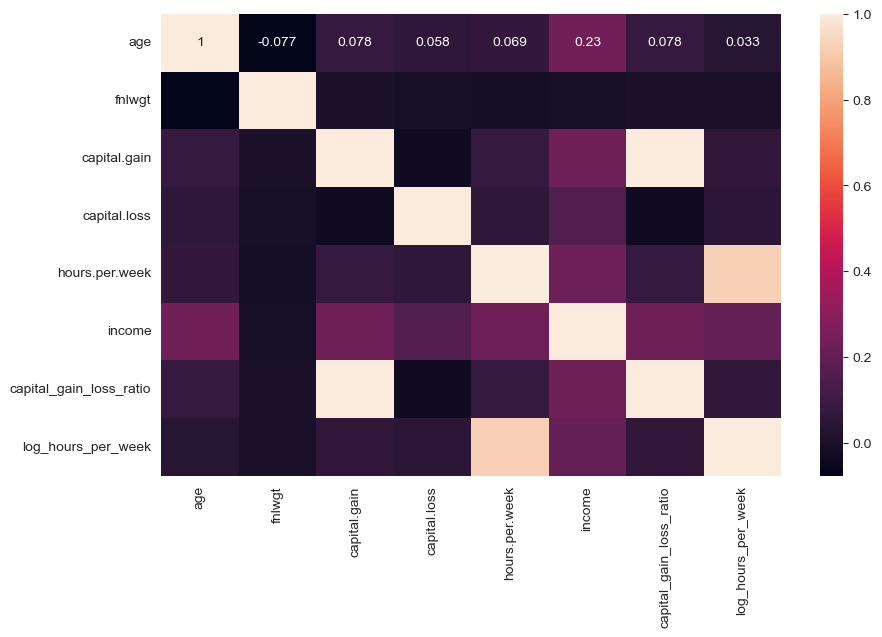

In [29]:
sns.heatmap(data=df.select_dtypes("number").corr(), annot=True);

#### There are positive and relatively strong relationships between "income" and "age", "capita-gain" and "hours-per-week".

### Find outlier values which extends the upper limit in both age and hours-per-week columns

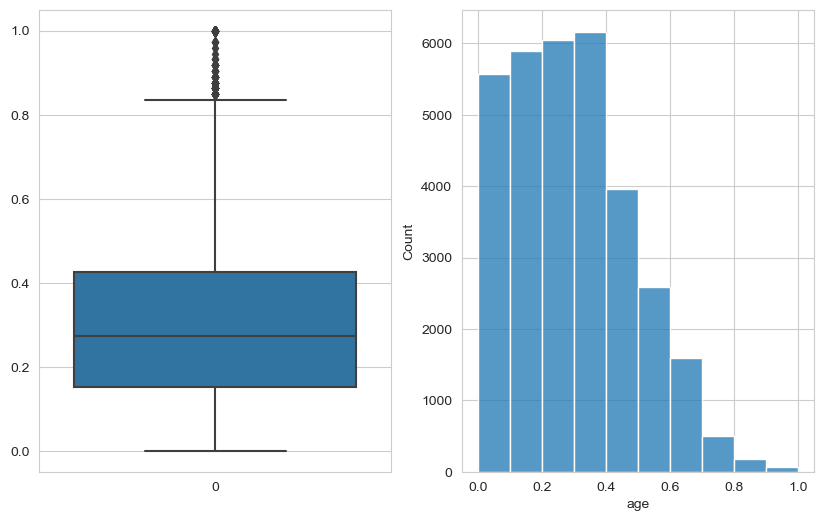

In [30]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=df.age) # Here whis=1.5 as default

plt.subplot(1,2,2)
sns.histplot(data=df.age, bins=10);

#### According to this boxplot, there are many outliers larger than the upper limit in the age column. By increasing the whisker, we can include some of these outliers in the analysis. 

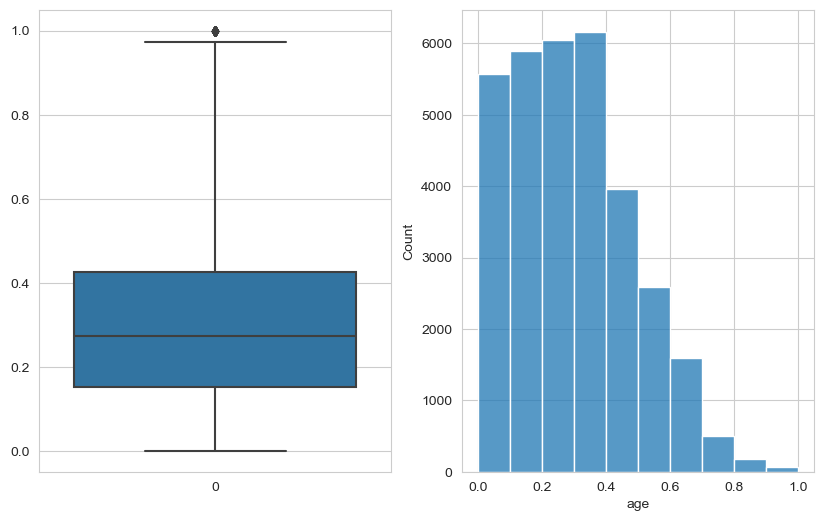

In [31]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=df.age, whis=2) # When whisker is increased, the number of outliers decreases. 

plt.subplot(1,2,2)
sns.histplot(data=df.age, bins=10);

#### When we changed Whisker to 2, the number of the outliers decreased to 1.

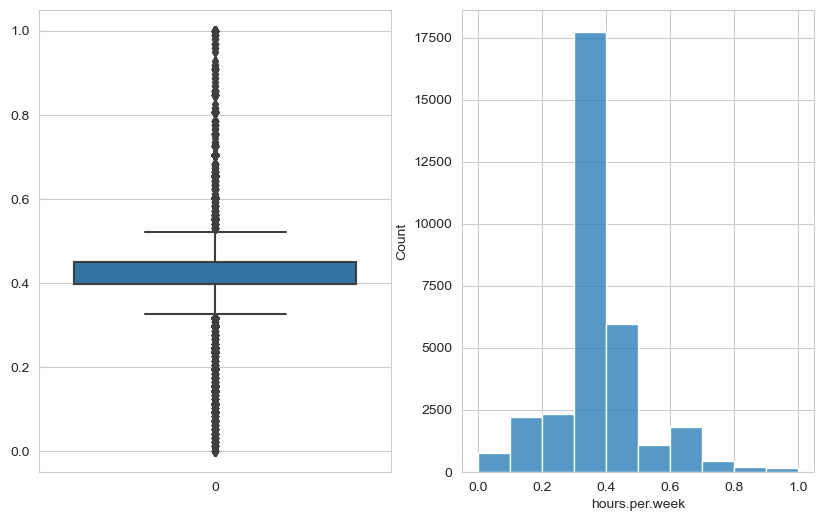

In [32]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=df["hours.per.week"])

plt.subplot(1,2,2)
sns.histplot(data=df["hours.per.week"], bins=10);

#### According to this boxplot, there are many outliers larger than the upper limit and lower limit in the "hours.per.week" column. By increasing the whisker, we can include some of these outliers in the analysis.

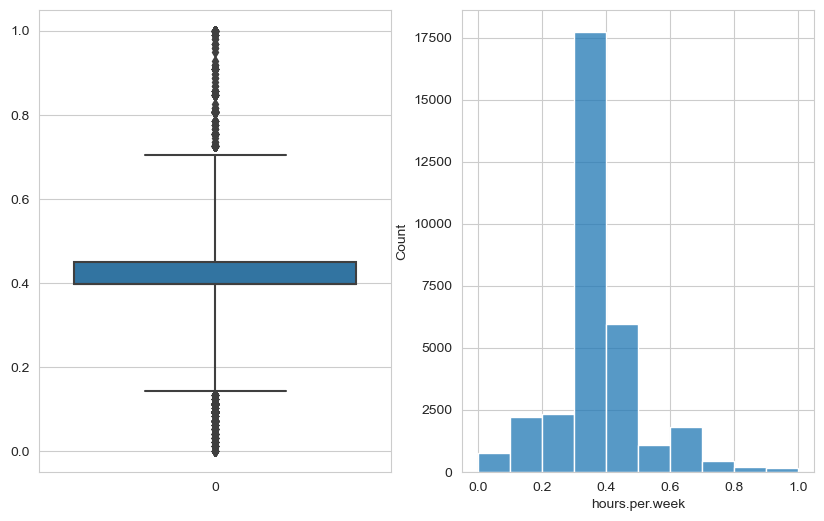

In [33]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=df["hours.per.week"], whis=5)

plt.subplot(1,2,2)
sns.histplot(data=df["hours.per.week"], bins=10);

#### Boxplots for all numeric features

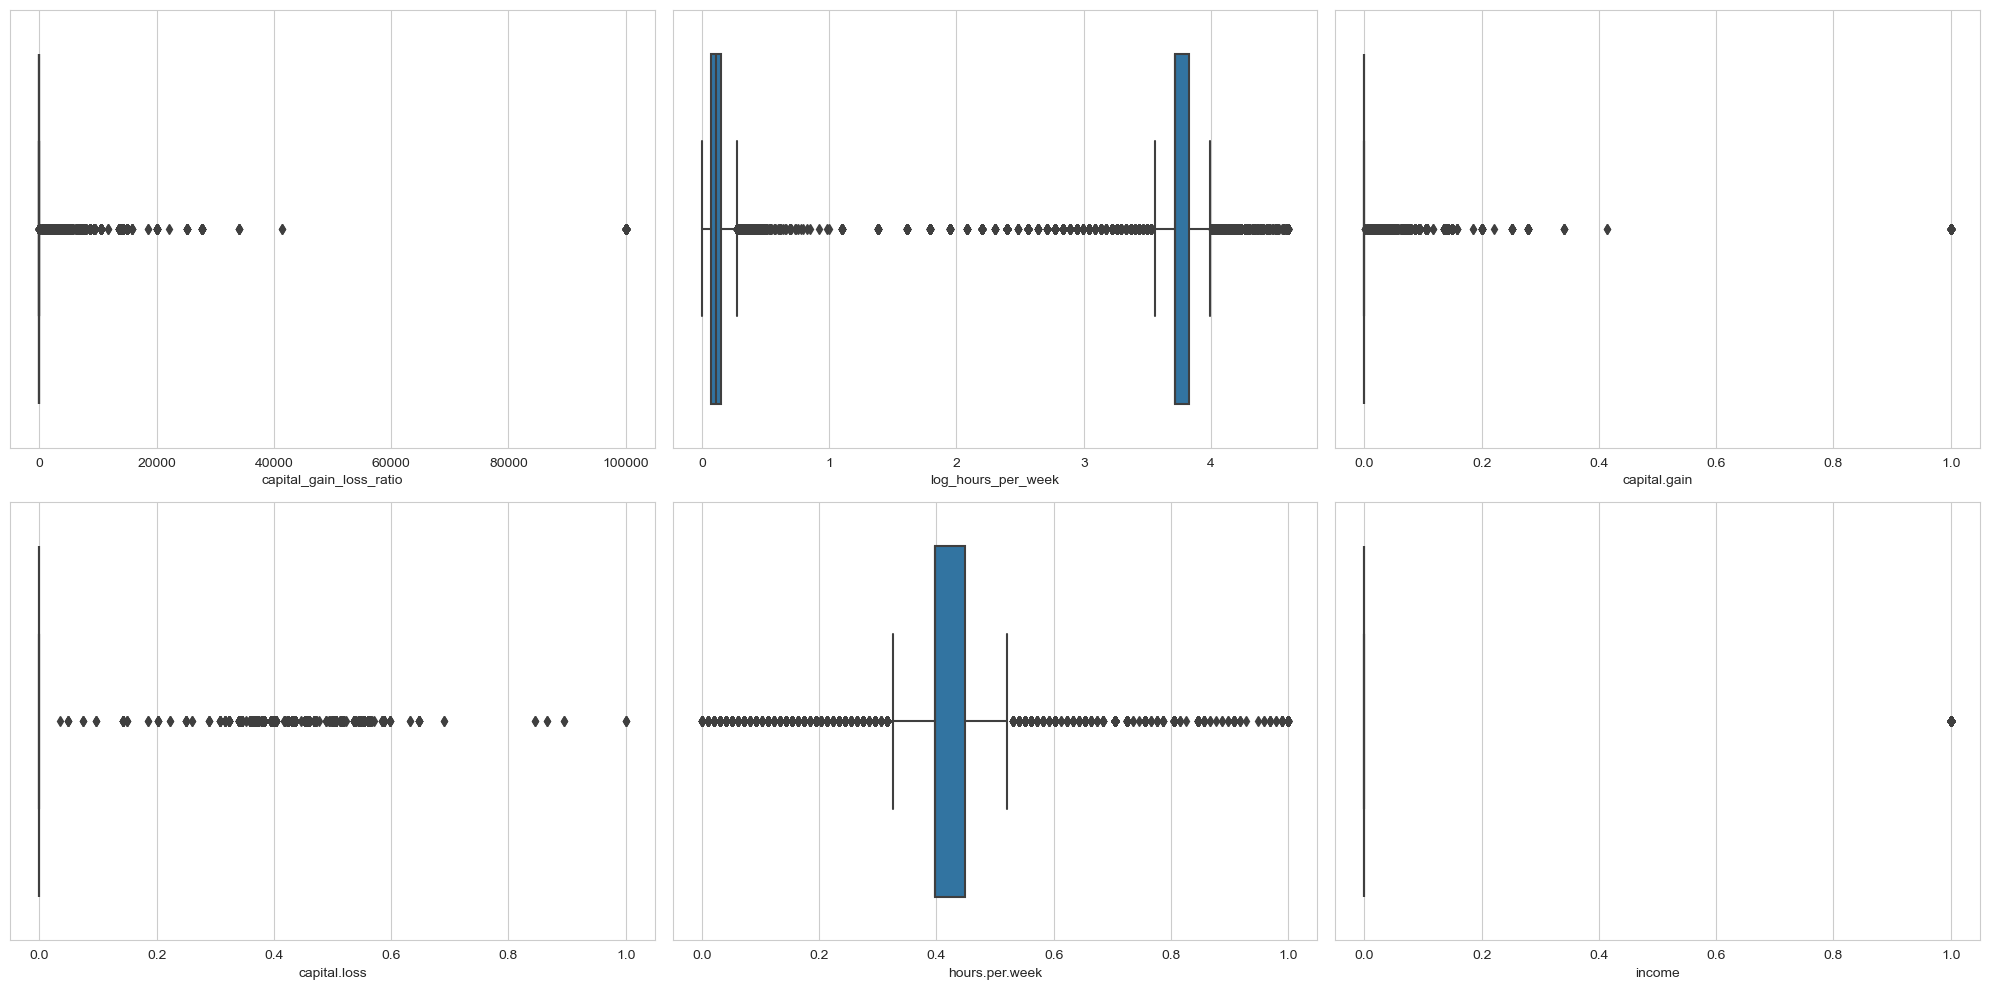

In [34]:
index = 0
plt.figure(figsize=(20, 10))

for i, feature in enumerate(df.select_dtypes('number').columns):
    index = i % 6 + 1  # Ensure index stays within 1 to 6
    plt.subplot(2, 3, index)
    sns.boxplot(x=feature, data=df, whis=1.5)

plt.tight_layout()
plt.show()

#### Boxplot and Histplot for all numeric features

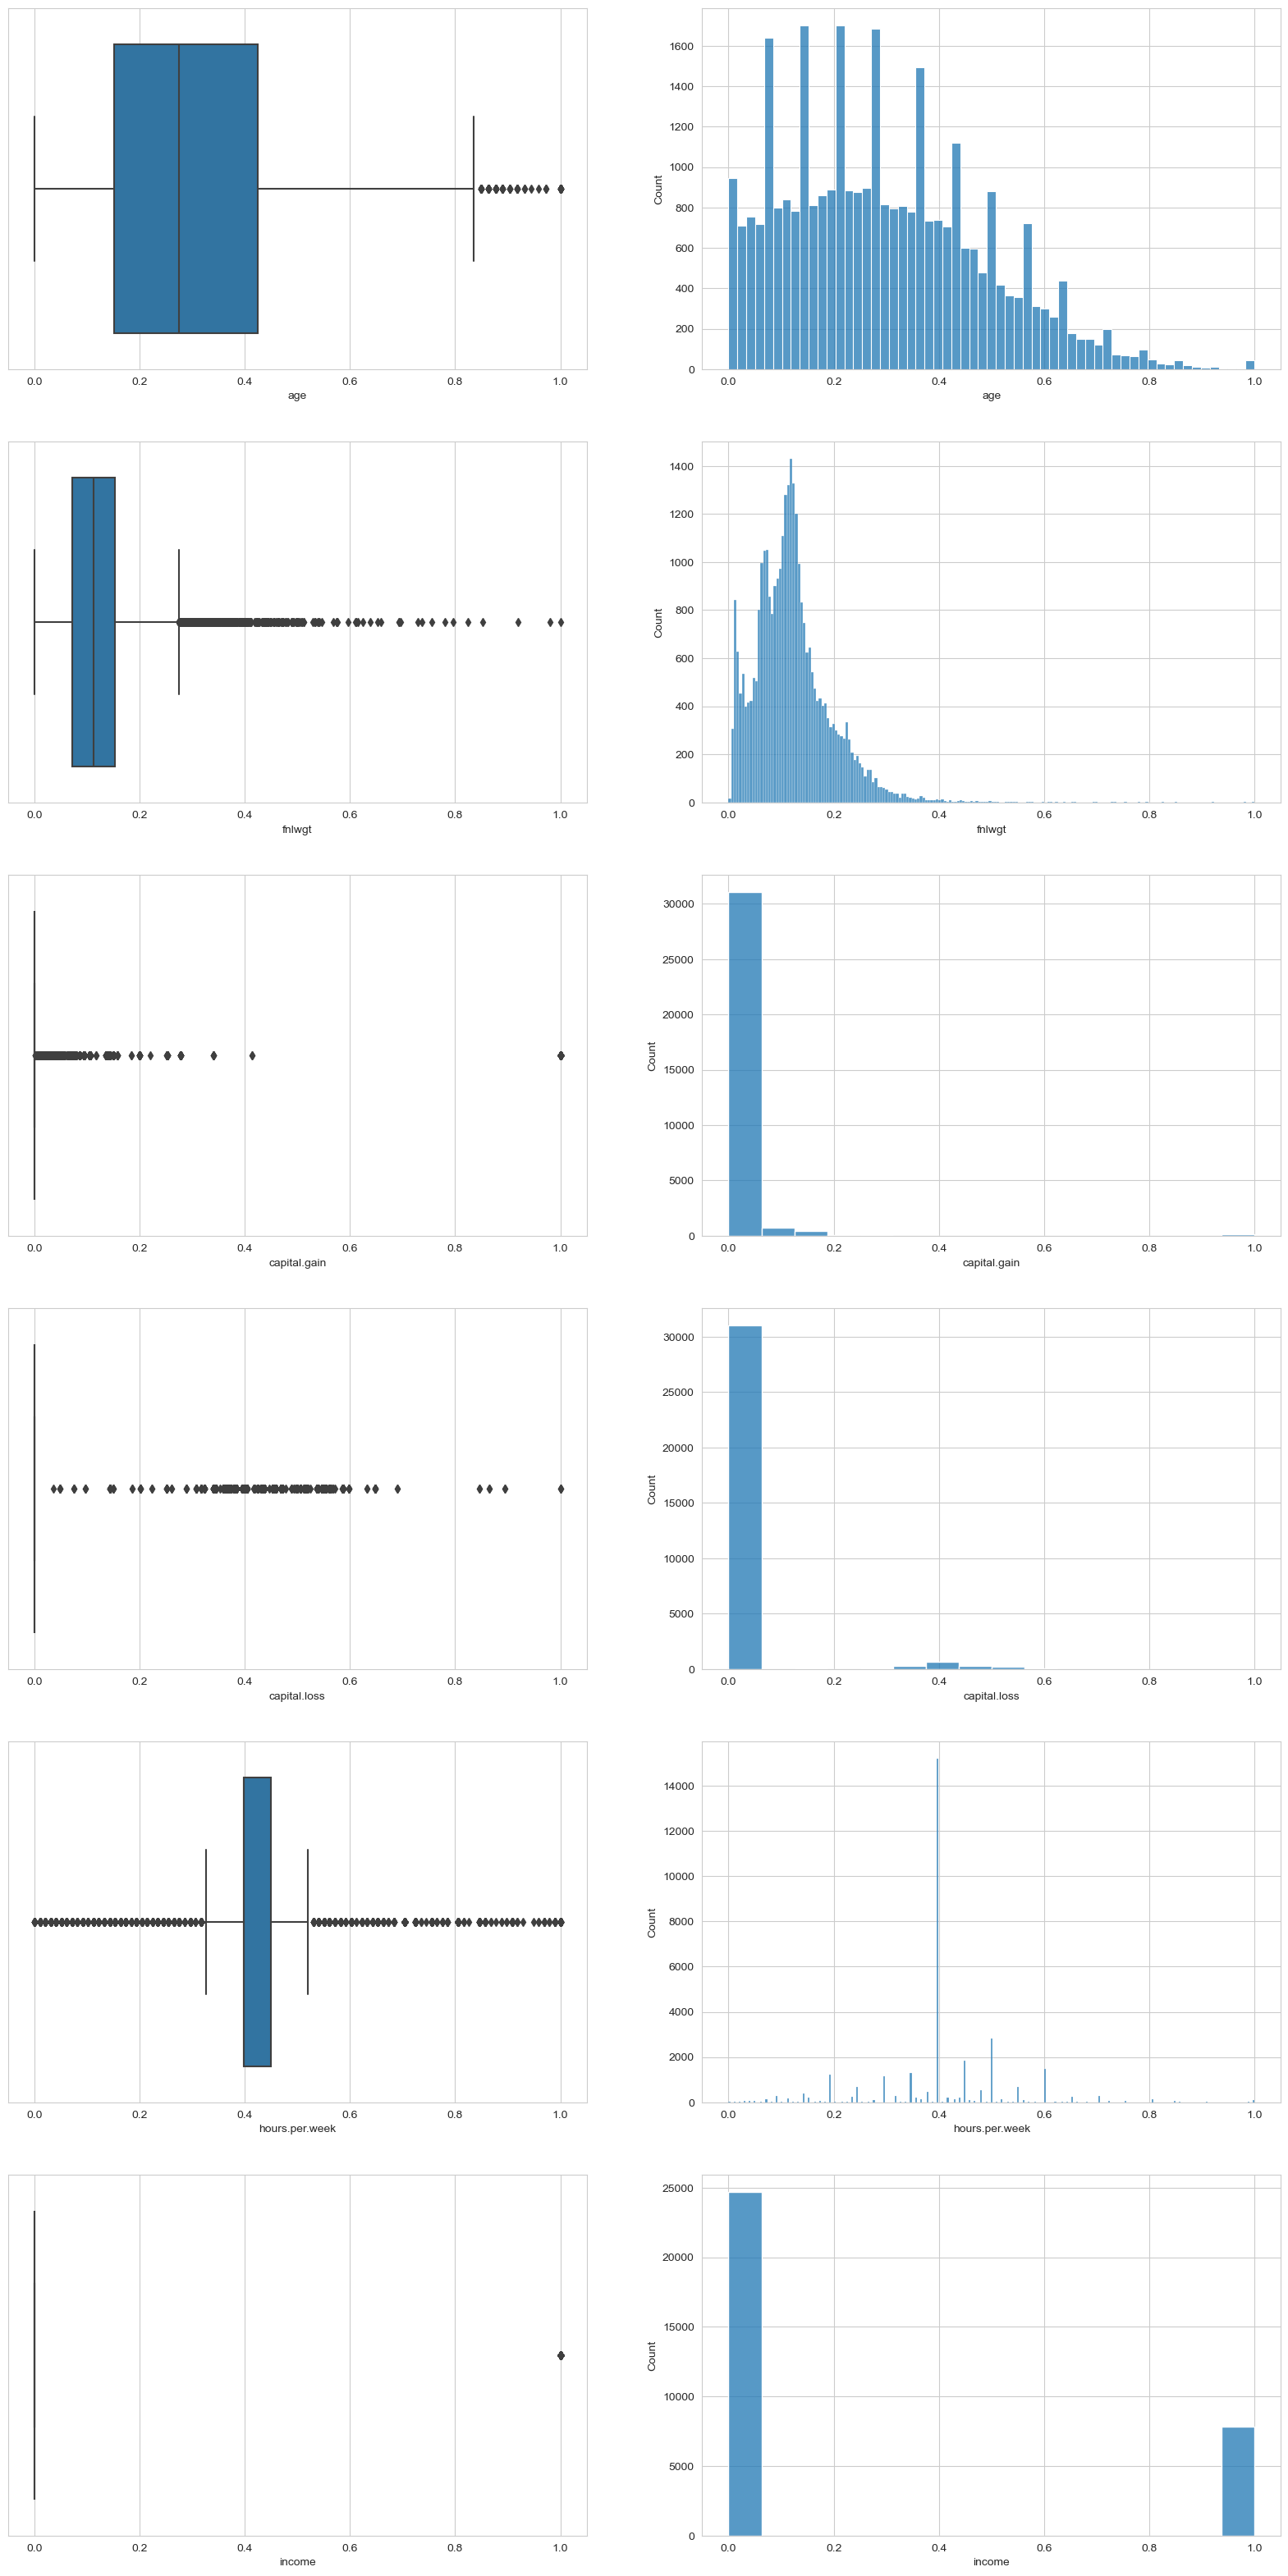

In [35]:
index = 0
plt.figure(figsize=(20, 40))

for feature in df.select_dtypes('number').columns:
    index += 1
    if index > 12:
        break
    
    plt.subplot(6, 2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    
    index += 1
    if index > 12:
        break
    
    plt.subplot(6, 2, index)
    sns.histplot(x=feature, data=df)

plt.show()

#### There are too much outlier in "age", "fnlwgt", "capital.gain", "capital.loss", and "hours.per.week" series.

In [36]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Handle missing values if any
df = df.fillna(df.mean(numeric_only=True))  # Fill missing values with column means

# Apply Isolation Forest for outlier detection
clf = IsolationForest(contamination=0.1)  # Adjust contamination based on dataset characteristics
outliers = clf.fit_predict(df)

# Remove outliers from the dataset
df = df[outliers != -1]

# Calculate the Predictive Power Score (PPS)
pps_matrix = pps.matrix(df)

# Display PPS matrix
print(pps_matrix)

# Compare PPS findings with the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                      x                        y  ppscore            case  \
0                   age                      age     1.00  predict_itself   
1                   age                workclass     0.00      regression   
2                   age                   fnlwgt     0.00      regression   
3                   age                education     0.00      regression   
4                   age           marital.status     0.17      regression   
..                  ...                      ...      ...             ...   
284  log_hours_per_week           native.country     0.00      regression   
285  log_hours_per_week                   income     0.00      regression   
286  log_hours_per_week     education_occupation     0.00      regression   
287  log_hours_per_week  capital_gain_loss_ratio     0.00      regression   
288  log_hours_per_week       log_hours_per_week     1.00  predict_itself   

     is_valid_score               metric  baseline_score  model_score  \
0 

#### After looking at the outliers you can drop the rows which actually does not make any sense.

### Let's find those whose age is higher than the upper limit of 78 and whose weekly working hours are higher than the upper limit of 52.5.

In [37]:
outliers_index = df[(df.age > 78) & (df["hours.per.week"] > 52.5)].index # Yaşı üst sınır olan 78'den, haftalık çalışma süresi üst sınır olan 52.5'ten yüksek olanlar.  
outliers_index

Int64Index([], dtype='int64')

In [38]:
df.drop(index = outliers_index, inplace = True)

### Let's check, is tehere anyboday older than 78 and works 52.5 hours per week.

In [39]:
outliers_index = df[(df.age > 78) & (df["hours.per.week"] > 52.5)].index # Yaşı üst sınır olan 78'den, haftalık çalışma süresi üst sınır olan 52.5'ten yüksek olanlar.  
outliers_index

Int64Index([], dtype='int64')

### Is there anybody whose age is higher than the 65 and whose weekly working hours 99.

In [40]:
outliers_index_1 = df[(df.age > 65) & (df["hours.per.week"] == 99)].index    
outliers_index_1

Int64Index([], dtype='int64')

In [41]:
df.drop(index = outliers_index_1, inplace= True )

In [42]:
outliers_index_1 = df[(df.age > 65) & (df["hours.per.week"] == 99)].index    
outliers_index_1

Int64Index([], dtype='int64')

In [43]:
df.race.value_counts()

4    25623
2     2644
1      647
3      211
0      180
Name: race, dtype: int64

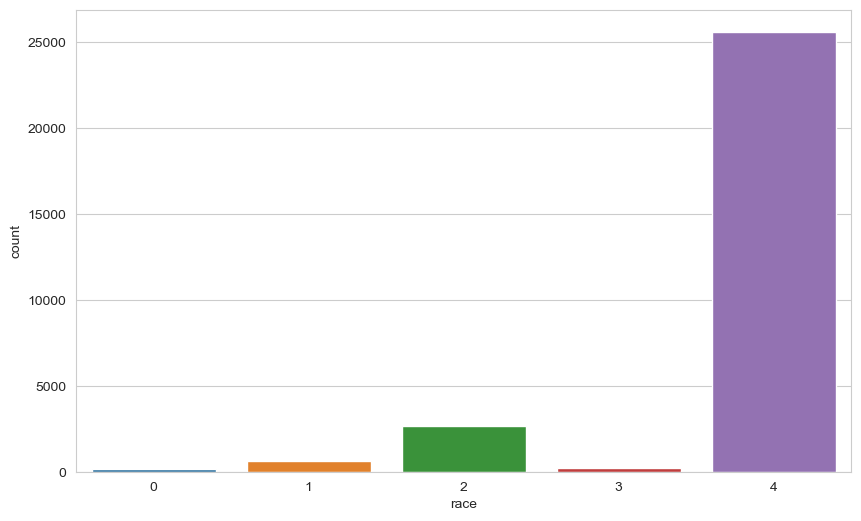

In [44]:
sns.countplot(x = "race", data=df);

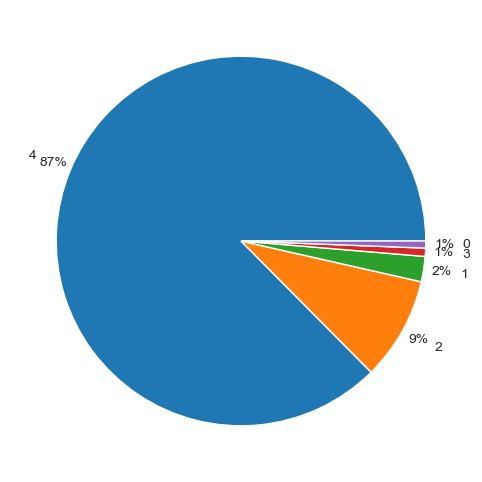

In [45]:
plt.pie(df.race.value_counts(), labels=df.race.value_counts().index, autopct='%.0f%%', labeldistance=1.2, pctdistance=1.1);

#### Of the people in this analysis, 32.26% had high school education, 22.4% had college education, 16.44% had bachelors, 5.28% had masters and 1.27% had doctorate degrees.